In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
import seaborn as sns

# Study data files
#athlete_events_path = "data_set/athlete_events.csv"
olympic_medals_path = "Data_Sets/olympic_medals.csv"
Countrys_GDP_path = "Data_Sets/Country wise GDP from 1994 to 2017.csv"

# Read the olympics data and the study results
medals_Year = []
#athlete_events = pd.read_csv(athlete_events_path)
olympic_medals = pd.read_csv(olympic_medals_path)
Countrys_GDP = pd.read_csv(Countrys_GDP_path)
medals_Year = olympic_medals['slug_game'].str[-4:]
olympic_medals['medals_Year'] = medals_Year.astype('int64')
# Concatinate athletes name in olympic medals file to come up with full name that can be used to merge with athlete_events file 

Countrys_GDP.head()

,Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population
0,2017,United States of America,1.948540e+13,1.734860e+13,2.27,53366,0.64,325084756
1,2016,United States of America,1.870720e+13,1.697230e+13,1.49,52543,0.67,323015995
2,2015,United States of America,1.821930e+13,1.671050e+13,2.86,52077,0.69,320878310
3,2014,United States of America,1.752170e+13,1.624250e+13,2.57,50969,0.72,318673411
4,2013,United States of America,1.678490e+13,1.585380e+13,1.68,50107,0.75,316400538


In [2]:
Countrys_GDP.describe()

,Year,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population
count,4326.000000,4.326000e+03,4.326000e+03,4326.000000,4326.000000,4326.000000,4.326000e+03
mean,2005.839806,2.849600e+11,3.229449e+11,3.823160,12531.465095,1.505032,3.561876e+07
std,6.881793,1.217041e+12,1.261344e+12,5.953154,17768.051337,1.517577,1.349238e+08
min,1994.000000,1.088683e+07,0.000000e+00,-62.080000,0.000000,-6.390000,9.252000e+03
25%,2000.000000,3.656094e+09,4.824270e+09,1.672500,1379.000000,0.510000,1.595111e+06
50%,2006.000000,1.667511e+10,2.080079e+10,3.790000,4402.000000,1.360000,7.084947e+06
75%,2012.000000,1.170678e+11,1.518028e+11,6.020000,15485.250000,2.397500,2.265789e+07
max,2017.000000,1.948540e+13,1.734860e+13,149.970000,113166.000000,19.140000,1.421022e+09


In [3]:
Countrys_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4326 non-null   int64  
 1   Country                  4326 non-null   object 
 2   GDP (in USD)             4326 non-null   float64
 3   GDP Real (in USD)        4326 non-null   float64
 4   GDP change (%)           4326 non-null   float64
 5   GDP per capita (in USD)  4326 non-null   int64  
 6   Pop. change (%)          4326 non-null   float64
 7   Population               4326 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 270.5+ KB


In [4]:
# Study data files
#athlete_events_path = "data_set/athlete_events.csv"
olympic_medals_path = "Data_Sets/olympic_medals.csv"
Countrys_GDP_path = "Data_Sets/Country wise GDP from 1994 to 2017.csv"

# Read the olympics data and the study results
medals_Year = []
#athlete_events = pd.read_csv(athlete_events_path)
olympic_medals = pd.read_csv(olympic_medals_path)
Countrys_GDP = pd.read_csv(Countrys_GDP_path)
medals_Year = olympic_medals['slug_game'].str[-4:]
olympic_medals['medals_Year'] = medals_Year.astype('int64')
# Concatinate athletes name in olympic medals file to come up with full name that can be used to merge with athlete_events file 

In [5]:
olympic_medals.head()

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,country_name,country_code,country_tri_letter_code,medals_Year
0,0,Skeleton,pyeongchang-2018,Women,Women,GOLD,Athlete,NaN,Lizzy,YARNOLD,Great Britain,GB,GBR,2018
1,1,Skeleton,pyeongchang-2018,Women,Women,SILVER,Athlete,NaN,Jacqueline,LOELLING,Germany,DE,GER,2018
2,2,Skeleton,pyeongchang-2018,Women,Women,BRONZE,Athlete,NaN,Laura,DEAS,Great Britain,GB,GBR,2018
3,3,Skeleton,pyeongchang-2018,Men,Men,GOLD,Athlete,NaN,Sungbin,YUN,Republic of Korea,KR,KOR,2018
4,4,Skeleton,pyeongchang-2018,Men,Men,SILVER,Athlete,NaN,Nikita,TREGUBOV,Russia,NaN,OAR,2018


In [6]:
olympic_medals.describe()

,Unnamed: 0,medals_Year
count,20142.000000,20142.000000
mean,10070.500000,1976.941912
std,5814.638897,32.590934
min,0.000000,1896.000000
25%,5035.250000,1956.000000
50%,10070.500000,1984.000000
75%,15105.750000,2004.000000
max,20141.000000,2018.000000


In [7]:
olympic_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20142 entries, 0 to 20141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               20142 non-null  int64 
 1   discipline_title         20142 non-null  object
 2   slug_game                20142 non-null  object
 3   event_title              20142 non-null  object
 4   event_gender             20142 non-null  object
 5   medal_type               20142 non-null  object
 6   participant_type         20142 non-null  object
 7   participant_title        6060 non-null   object
 8   athlete_name             16762 non-null  object
 9   athlete_surname          16762 non-null  object
 10  country_name             20142 non-null  object
 11  country_code             18623 non-null  object
 12  country_tri_letter_code  20142 non-null  object
 13  medals_Year              20142 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 

In [8]:
diff_cols = Countrys_GDP.columns.difference(olympic_medals.columns)
diff_cols

Index(['Country', 'GDP (in USD)', 'GDP Real (in USD)', 'GDP change (%)',
       'GDP per capita (in USD)', 'Pop. change (%)', 'Population', 'Year'],
      dtype='object')

In [9]:
#Filter out the columns that are different. You could pass in the df2[diff_cols] directly into the merge as well.
Diff_GDP_columns = Countrys_GDP[diff_cols]

#Merge the DataFrames
df_merged = pd.merge(olympic_medals, Diff_GDP_columns, right_on=['Country','Year'],left_on=['country_name','medals_Year'], how='inner')
df_merged

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,...,country_tri_letter_code,medals_Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Year
0,331,Cycling BMX,rio-2016,Individual women,Women,GOLD,Athlete,NaN,Mariana,PAJON,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
1,336,Cycling BMX,rio-2016,Individual men,Men,BRONZE,Athlete,NaN,Carlos Alberto,RAMIREZ YEPES,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
2,556,Athletics,rio-2016,triple jump women,Women,GOLD,Athlete,NaN,Caterine,IBARGUEN,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
3,658,Weightlifting,rio-2016,62kg featherweight men,Men,GOLD,Athlete,NaN,Oscar,FIGUEROA,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
4,675,Weightlifting,rio-2016,69kg men,Men,BRONZE,Athlete,NaN,Luis Javier,MOSQUERA LOZANO,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,7899,Figure skating,lillehammer-1994,Ice dancing mixed,Mixed,BRONZE,GameTeam,Great Britain team,Christopher,DEAN,...,GBR,1994,Great Britain,1.140490e+12,1.736820e+12,3.88,30068,0.28,57763378,1994
7408,7872,Short Track Speed Skating,lillehammer-1994,5000m relay men,Men,BRONZE,GameTeam,Australia team,NaN,NaN,...,AUS,1994,Australia,3.222010e+11,6.630350e+11,3.98,37252,1.11,17798529,1994
7409,7934,Cross Country Skiing,lillehammer-1994,Combined 10km 15km pursuit men,Men,SILVER,Athlete,NaN,Vladimir,SMIRNOV,...,KAZ,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994
7410,7942,Cross Country Skiing,lillehammer-1994,50km men,Men,GOLD,Athlete,NaN,Vladimir,SMIRNOV,...,KAZ,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7411
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7412 non-null   int64  
 1   discipline_title         7412 non-null   object 
 2   slug_game                7412 non-null   object 
 3   event_title              7412 non-null   object 
 4   event_gender             7412 non-null   object 
 5   medal_type               7412 non-null   object 
 6   participant_type         7412 non-null   object 
 7   participant_title        2363 non-null   object 
 8   athlete_name             6299 non-null   object 
 9   athlete_surname          6299 non-null   object 
 10  country_name             7412 non-null   object 
 11  country_code             7394 non-null   object 
 12  country_tri_letter_code  7412 non-null   object 
 13  medals_Year              7412 non-null   int64  
 14  Country                 

In [11]:
df_merged.describe()

,Unnamed: 0,medals_Year,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Year
count,7412.000000,7412.000000,7.412000e+03,7.412000e+03,7412.000000,7412.000000,7412.000000,7.412000e+03,7412.000000
mean,4146.705613,2006.032920,2.820142e+12,3.037957e+12,3.243612,29156.884916,0.547171,1.827487e+08,2006.032920
std,2202.772677,6.769884,4.397822e+12,4.387395e+12,3.441330,21055.245777,0.710224,3.505928e+08,6.769884
min,331.000000,1994.000000,2.195836e+08,2.916737e+08,-22.930000,197.000000,-2.600000,9.627300e+04,1994.000000
25%,2243.750000,2000.000000,2.597100e+11,3.485420e+11,1.440000,6950.000000,0.100000,1.656810e+07,2000.000000
50%,4141.500000,2006.000000,1.052580e+12,1.342740e+12,2.930000,35220.000000,0.550000,5.854262e+07,2006.000000
75%,6050.250000,2012.000000,2.676610e+12,3.123910e+12,4.690000,45128.000000,0.960000,1.446648e+08,2012.000000
max,7968.000000,2016.000000,1.870720e+13,1.697230e+13,26.850000,90864.000000,9.610000,1.414049e+09,2016.000000


In [12]:
nuu_df = df_merged[df_merged['athlete_name'].isnull()]
nuu_df_1 = df_merged[df_merged['participant_title'].isnull()]
nuu_df_3 = df_merged[df_merged['participant_title'].notnull()]
nuu_df_4 = df_merged[df_merged['country_tri_letter_code'].isnull()]

In [13]:
nuu_df_4['country_tri_letter_code'].unique()

array([], dtype=object)

In [14]:
df_merged

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,...,country_tri_letter_code,medals_Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Year
0,331,Cycling BMX,rio-2016,Individual women,Women,GOLD,Athlete,NaN,Mariana,PAJON,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
1,336,Cycling BMX,rio-2016,Individual men,Men,BRONZE,Athlete,NaN,Carlos Alberto,RAMIREZ YEPES,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
2,556,Athletics,rio-2016,triple jump women,Women,GOLD,Athlete,NaN,Caterine,IBARGUEN,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
3,658,Weightlifting,rio-2016,62kg featherweight men,Men,GOLD,Athlete,NaN,Oscar,FIGUEROA,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
4,675,Weightlifting,rio-2016,69kg men,Men,BRONZE,Athlete,NaN,Luis Javier,MOSQUERA LOZANO,...,COL,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,7899,Figure skating,lillehammer-1994,Ice dancing mixed,Mixed,BRONZE,GameTeam,Great Britain team,Christopher,DEAN,...,GBR,1994,Great Britain,1.140490e+12,1.736820e+12,3.88,30068,0.28,57763378,1994
7408,7872,Short Track Speed Skating,lillehammer-1994,5000m relay men,Men,BRONZE,GameTeam,Australia team,NaN,NaN,...,AUS,1994,Australia,3.222010e+11,6.630350e+11,3.98,37252,1.11,17798529,1994
7409,7934,Cross Country Skiing,lillehammer-1994,Combined 10km 15km pursuit men,Men,SILVER,Athlete,NaN,Vladimir,SMIRNOV,...,KAZ,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994
7410,7942,Cross Country Skiing,lillehammer-1994,50km men,Men,GOLD,Athlete,NaN,Vladimir,SMIRNOV,...,KAZ,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994


In [15]:
df_merged['Medal_Won'] = np.where(df_merged.loc[:,'medal_type']== 'na',0, 1)

In [16]:
df_merged.head()

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,...,medals_Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Year,Medal_Won
0,331,Cycling BMX,rio-2016,Individual women,Women,GOLD,Athlete,NaN,Mariana,PAJON,...,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016,1
1,336,Cycling BMX,rio-2016,Individual men,Men,BRONZE,Athlete,NaN,Carlos Alberto,RAMIREZ YEPES,...,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016,1
2,556,Athletics,rio-2016,triple jump women,Women,GOLD,Athlete,NaN,Caterine,IBARGUEN,...,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016,1
3,658,Weightlifting,rio-2016,62kg featherweight men,Men,GOLD,Athlete,NaN,Oscar,FIGUEROA,...,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016,1
4,675,Weightlifting,rio-2016,69kg men,Men,BRONZE,Athlete,NaN,Luis Javier,MOSQUERA LOZANO,...,2016,Colombia,2.828560e+11,3.669060e+11,1.96,7616,1.38,48175052,2016,1


In [17]:
df_merged.tail()

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,...,medals_Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Year,Medal_Won
7407,7899,Figure skating,lillehammer-1994,Ice dancing mixed,Mixed,BRONZE,GameTeam,Great Britain team,Christopher,DEAN,...,1994,Great Britain,1.140490e+12,1.736820e+12,3.88,30068,0.28,57763378,1994,1
7408,7872,Short Track Speed Skating,lillehammer-1994,5000m relay men,Men,BRONZE,GameTeam,Australia team,NaN,NaN,...,1994,Australia,3.222010e+11,6.630350e+11,3.98,37252,1.11,17798529,1994,1
7409,7934,Cross Country Skiing,lillehammer-1994,Combined 10km 15km pursuit men,Men,SILVER,Athlete,NaN,Vladimir,SMIRNOV,...,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994,1
7410,7942,Cross Country Skiing,lillehammer-1994,50km men,Men,GOLD,Athlete,NaN,Vladimir,SMIRNOV,...,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994,1
7411,7946,Cross Country Skiing,lillehammer-1994,10km pursuit men,Men,SILVER,Athlete,NaN,Vladimir,SMIRNOV,...,1994,Kazakhstan,2.125084e+10,6.440766e+10,-12.60,4020,-0.98,16022222,1994,1


In [18]:
df_merged.columns

Index(['Unnamed: 0', 'discipline_title', 'slug_game', 'event_title',
       'event_gender', 'medal_type', 'participant_type', 'participant_title',
       'athlete_name', 'athlete_surname', 'country_name', 'country_code',
       'country_tri_letter_code', 'medals_Year', 'Country', 'GDP (in USD)',
       'GDP Real (in USD)', 'GDP change (%)', 'GDP per capita (in USD)',
       'Pop. change (%)', 'Population', 'Year', 'Medal_Won'],
      dtype='object')

In [19]:
cols = ["Country", "Population", "GDP Real (in USD)", "Medal_Won"]
df_merged[cols].head()

,Country,Population,GDP Real (in USD),Medal_Won
0,Colombia,48175052,3.669060e+11,1
1,Colombia,48175052,3.669060e+11,1
2,Colombia,48175052,3.669060e+11,1
3,Colombia,48175052,3.669060e+11,1
4,Colombia,48175052,3.669060e+11,1


In [20]:
df_merged2 = df_merged[cols]

In [21]:
df_merged2.head()

,Country,Population,GDP Real (in USD),Medal_Won
0,Colombia,48175052,3.669060e+11,1
1,Colombia,48175052,3.669060e+11,1
2,Colombia,48175052,3.669060e+11,1
3,Colombia,48175052,3.669060e+11,1
4,Colombia,48175052,3.669060e+11,1


In [22]:
df_merged2.describe()

,Population,GDP Real (in USD),Medal_Won
count,7.412000e+03,7.412000e+03,7412.0
mean,1.827487e+08,3.037957e+12,1.0
std,3.505928e+08,4.387395e+12,0.0
min,9.627300e+04,2.916737e+08,1.0
25%,1.656810e+07,3.485420e+11,1.0
50%,5.854262e+07,1.342740e+12,1.0
75%,1.446648e+08,3.123910e+12,1.0
max,1.414049e+09,1.697230e+13,1.0


In [23]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7411
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7412 non-null   object 
 1   Population         7412 non-null   int64  
 2   GDP Real (in USD)  7412 non-null   float64
 3   Medal_Won          7412 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 260.6+ KB


In [24]:
# Using GroupBy in order to separate the data into fields according to "country" values
grouped_df_merged2 = df_merged2.groupby(['Country'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df_merged2)

In [25]:
# In order to be visualized, a data function must be used...
grouped_df_merged2.count().head

<bound method NDFrame.head of              Population  GDP Real (in USD)  Medal_Won
Country                                              
Afghanistan           2                  2          2
Algeria              13                 13         13
Argentina            34                 34         34
Armenia              14                 14         14
Australia           314                314        314
...                 ...                ...        ...
Uruguay               1                  1          1
Uzbekistan           31                 31         31
Vietnam               4                  4          4
Zambia                1                  1          1
Zimbabwe              7                  7          7

[108 rows x 3 columns]>

In [26]:
country_total_population = grouped_df_merged2["Population"].mean()
print(country_total_population)

Country
Afghanistan    2.944183e+07
Algeria        3.315064e+07
Argentina      3.955848e+07
Armenia        2.961226e+06
Australia      2.055791e+07
                   ...     
Uruguay        3.319736e+06
Uzbekistan     2.827110e+07
Vietnam        8.835867e+07
Zambia         9.339733e+06
Zimbabwe       1.222542e+07
Name: Population, Length: 108, dtype: float64


In [27]:
country_total_GDP = grouped_df_merged2["GDP Real (in USD)"].mean()
print(country_total_GDP)

Country
Afghanistan    1.468843e+10
Algeria        1.317503e+11
Argentina      3.689481e+11
Armenia        9.356182e+09
Australia      9.979755e+11
                   ...     
Uruguay        2.988343e+10
Uzbekistan     4.164479e+10
Vietnam        1.231781e+11
Zambia         8.788653e+09
Zimbabwe       1.046424e+10
Name: GDP Real (in USD), Length: 108, dtype: float64


In [28]:
country_total_medals = grouped_df_merged2["Medal_Won"].sum()
print(country_total_medals)

Country
Afghanistan      2
Algeria         13
Argentina       34
Armenia         14
Australia      314
              ... 
Uruguay          1
Uzbekistan      31
Vietnam          4
Zambia           1
Zimbabwe         7
Name: Medal_Won, Length: 108, dtype: int32


In [29]:
# Creating a new DataFrame using both Population and GDP
total_summary_df = pd.DataFrame({"Population": country_total_population,
                                    "GDP Real (in USD)": country_total_GDP,
                                    "Medal_Won": country_total_medals})
total_summary_df

,Population,GDP Real (in USD),Medal_Won
Country,,,
Afghanistan,2.944183e+07,1.468843e+10,2
Algeria,3.315064e+07,1.317503e+11,13
Argentina,3.955848e+07,3.689481e+11,34
Armenia,2.961226e+06,9.356182e+09,14
Australia,2.055791e+07,9.979755e+11,314
...,...,...,...
Uruguay,3.319736e+06,2.988343e+10,1
Uzbekistan,2.827110e+07,4.164479e+10,31
Vietnam,8.835867e+07,1.231781e+11,4


In [30]:
total_summary_df.describe()

,Population,GDP Real (in USD),Medal_Won
count,1.080000e+02,1.080000e+02,108.000000
mean,5.229992e+07,5.397473e+11,68.629630
std,1.759688e+08,1.604519e+12,134.328694
min,9.627300e+04,2.916737e+08,1.000000
25%,4.109835e+06,1.984919e+10,2.000000
50%,9.880484e+06,6.620064e+10,14.000000
75%,3.444908e+07,3.284837e+11,64.750000
max,1.343012e+09,1.423156e+13,832.000000


In [31]:
total_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         108 non-null    float64
 1   GDP Real (in USD)  108 non-null    float64
 2   Medal_Won          108 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.0+ KB


In [32]:
# To sort from highest to lowest, ascending=False must be passed in
Sorted_GDP_population = total_summary_df.sort_values(
    ["Population", "GDP Real (in USD)", "Medal_Won"], ascending=False)
Sorted_GDP_population.head(107)

,Population,GDP Real (in USD),Medal_Won
Country,,,
People's Republic of China,1.343012e+09,5.053120e+12,571
India,1.215306e+09,1.649800e+12,14
United States of America,2.981040e+08,1.423156e+13,832
Indonesia,2.259790e+08,6.263116e+11,34
Brazil,1.881834e+08,1.927112e+12,112
...,...,...,...
Bahamas,3.293386e+05,9.798840e+09,11
Iceland,2.956455e+05,1.252429e+10,2
Barbados,2.715150e+05,4.122565e+09,1


In [33]:
# To sort from highest to lowest, ascending=False must be passed in
Sorted_population = total_summary_df.sort_values(by="Population", ascending=False)
Sorted_population.head()

,Population,GDP Real (in USD),Medal_Won
Country,,,
People's Republic of China,1.343012e+09,5.053120e+12,571
India,1.215306e+09,1.649800e+12,14
United States of America,2.981040e+08,1.423156e+13,832
Indonesia,2.259790e+08,6.263116e+11,34
Brazil,1.881834e+08,1.927112e+12,112


In [34]:
Sorted_GDP = total_summary_df.sort_values(by="GDP Real (in USD)", ascending=False)
Sorted_GDP.head()

,Population,GDP Real (in USD),Medal_Won
Country,,,
United States of America,2.981040e+08,1.423156e+13,832
Japan,1.279275e+08,5.673192e+12,212
People's Republic of China,1.343012e+09,5.053120e+12,571
Germany,8.136855e+07,3.265358e+12,524
France,6.138061e+07,2.514960e+12,306


In [35]:
Sorted_medals_won = total_summary_df.sort_values(by="Medal_Won", ascending=False)
Sorted_medals_won.head()

,Population,GDP Real (in USD),Medal_Won
Country,,,
United States of America,2.981040e+08,1.423156e+13,832
Russia,1.452112e+08,1.285434e+12,591
People's Republic of China,1.343012e+09,5.053120e+12,571
Germany,8.136855e+07,3.265358e+12,524
Australia,2.055791e+07,9.979755e+11,314


In [36]:
totalmedal_won = Sorted_medals_won.reset_index()
totalmedal_won.head()

,Country,Population,GDP Real (in USD),Medal_Won
0,United States of America,2.981040e+08,1.423156e+13,832
1,Russia,1.452112e+08,1.285434e+12,591
2,People's Republic of China,1.343012e+09,5.053120e+12,571
3,Germany,8.136855e+07,3.265358e+12,524
4,Australia,2.055791e+07,9.979755e+11,314


In [37]:
dftest = Sorted_GDP_population.reset_index()
dftest

,Country,Population,GDP Real (in USD),Medal_Won
0,People's Republic of China,1.343012e+09,5.053120e+12,571
1,India,1.215306e+09,1.649800e+12,14
2,United States of America,2.981040e+08,1.423156e+13,832
3,Indonesia,2.259790e+08,6.263116e+11,34
4,Brazil,1.881834e+08,1.927112e+12,112
...,...,...,...,...
103,Iceland,2.956455e+05,1.252429e+10,2
104,Barbados,2.715150e+05,4.122565e+09,1
105,Samoa,1.832630e+05,6.723065e+08,1
106,Grenada,1.088535e+05,8.497830e+08,2


In [38]:
dftest.columns

Index(['Country', 'Population', 'GDP Real (in USD)', 'Medal_Won'], dtype='object')

In [39]:
#1: Countries with Highest Population Vs Lowest Population Medal Count

In [40]:
population1 = dftest.loc[dftest.Population >10000000, "Medal_Won"].values
population2 = dftest.loc[dftest.Population <10000000, "Medal_Won"].values

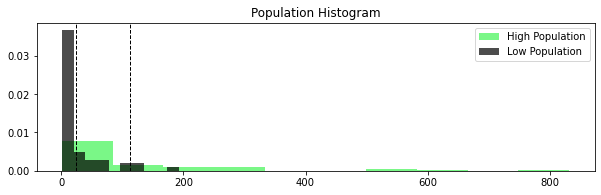

In [41]:
# Histogram Plot of Data
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.hist(population1, density=True, alpha=0.7, color= '#42f554', label="High Population")
plt.hist(population2, density=True, alpha=0.7, color= '#000000', label="Low Population")
plt.axvline(population1.mean(), color= 'k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color= 'k', linestyle='dashed', linewidth=1)
plt.title("Population Histogram")
plt.legend()  
plt.show()

In [42]:
population1

array([571,  14, 832,  34, 112, 591,  17, 212,  31,   4,   2,  14,  40,
       524,  37,  29, 307, 306, 272,  35, 234, 135,  22, 119,  63,  34,
       101,  13,   1, 250,  14,   2,  31,  14,   2,   3,  98,   1, 314,
         1,   4,   2, 195,  71,   6,   1,   2,   7, 139,  54,   8,  28,
        13, 111])

In [43]:
population2

array([  6, 101,   1,   1, 117,  43,  16,   2, 122,  57,   4, 110,   7,
         2,   4,   1,   1,  64,  38,   4,  67,   4, 192,  69,  17,  37,
        32,   3,   1,   1,  20,  14,  53,  13,   2,  21,  30,   1,   4,
         1,   2,   3,  13,  12,   1,   1,   1,   1,  11,   2,   1,   1,
         2,   1])

In [44]:
population1.mean()

112.53703703703704

In [45]:
population2.mean()

24.72222222222222

In [46]:
population1.mean() - population2.mean()

87.81481481481481

In [47]:
population1.var()

30359.0634430727

In [48]:
population2.var()

1539.4598765432102

In [49]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=3.5794840805415467, pvalue=0.0007011968483675539)

In [50]:
#2: Countries with Highest GDP VS Lowest GDP Medal Count

In [51]:
population3 = dftest.loc[dftest["GDP Real (in USD)"]>100000000000, "Medal_Won"].values
population4 = dftest.loc[dftest["GDP Real (in USD)"]<100000000000, "Medal_Won"].values

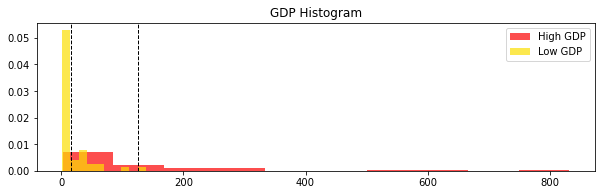

In [52]:
# Histogram Plot of Data
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.hist(population3, density=True, alpha=0.7, color= '#fc0303', label="High GDP")
plt.hist(population4, density=True, alpha=0.7, color= '#fcdf03', label="Low GDP")
plt.axvline(population3.mean(), color= 'k', linestyle='dashed', linewidth=1)
plt.axvline(population4.mean(), color= 'k', linestyle='dashed', linewidth=1)
plt.title("GDP Histogram")
plt.legend()  
plt.show()

In [53]:
population3

array([571,  14, 832,  34, 112, 591,  17, 212,  31,   4,   2,  14, 524,
        37,  29, 307, 306, 272,  35, 234, 135,  22, 119,  34, 101,  13,
       250,  14,   3,  98, 314, 195,  71,   6,  54,  28,  13, 111, 117,
       122, 110,   7,   2,   4,  64,   4,  67, 192,  69,  17,   2,   4])

In [54]:
population4

array([ 40,  63,   1,  14,   2,  31,   2,   1,   1,   4,   2,   1,   2,
         7, 139,   8,   6, 101,   1,   1,  43,  16,   2,  57,   4,   1,
         1,  38,   4,  37,  32,   3,   1,   1,  20,  14,  53,  13,  21,
        30,   1,   1,   2,   3,  13,  12,   1,   1,   1,   1,  11,   2,
         1,   1,   2,   1])

In [55]:
population3.mean()

125.76923076923077

In [56]:
population4.mean()

15.571428571428571

In [57]:
population3.mean() - population4.mean()

110.1978021978022

In [58]:
population3.var()

30112.06213017751

In [59]:
population4.var()

669.2091836734695

In [60]:
stats.ttest_ind(population3, population4, equal_var=False)

Ttest_indResult(statistic=4.489090473627021, pvalue=3.882296128400264e-05)